In [1]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
}) 

In [2]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [3]:
adr.obj = readRDS(glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/heatmap_objects/mouse_obj.rds'
        )
)

In [4]:
adr.list =  SplitObject(adr.obj, split.by = "orig.ident")

In [5]:
org.obj = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/organoid/combined_new_6_samples_annotated.rds'
        )
)

In [6]:
adr.list =  SplitObject(adr.obj, split.by = "orig.ident")

In [7]:
org.list = SplitObject(org.obj, split.by = "orig.ident")

In [8]:
homo.list = c(
    adr.list$homo1,
    adr.list$homo2,
    adr.list$homo3,
    org.list$no_6_PT,
    org.list$no_50_PT
)

In [9]:
names(homo.list) = c('homo1', 'homo2', 'homo3', 'no_6_PT', 'no_50_PT')

In [ ]:
homo.list <- lapply(X = homo.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 5000)
})

In [10]:
homo = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_homo.rds'
        )
)

In [12]:
homo

An object of class Seurat 
33411 features across 41430 samples within 2 assays 
Active assay: RNA (31411 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [13]:
DefaultAssay(homo) = "integrated"

In [14]:
homo

An object of class Seurat 
33411 features across 41430 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [15]:
homo <- ScaleData(homo, vars.to.regress = c("S.Score", "G2M.Score"), verbose = FALSE)
homo <- RunPCA(homo, npcs = 30, verbose = FALSE)
homo <- RunUMAP(homo, reduction = "pca", dims = 1:30)
homo <- FindNeighbors(homo, reduction = "pca", dims = 1:30)
homo <- FindClusters(homo, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:33:47 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:33:47 Read 41430 rows and found 30 numeric columns

14:33:47 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:33:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:33:51 Writing NN index file to 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1253784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8827
Number of communities: 20
Elapsed time: 9 seconds


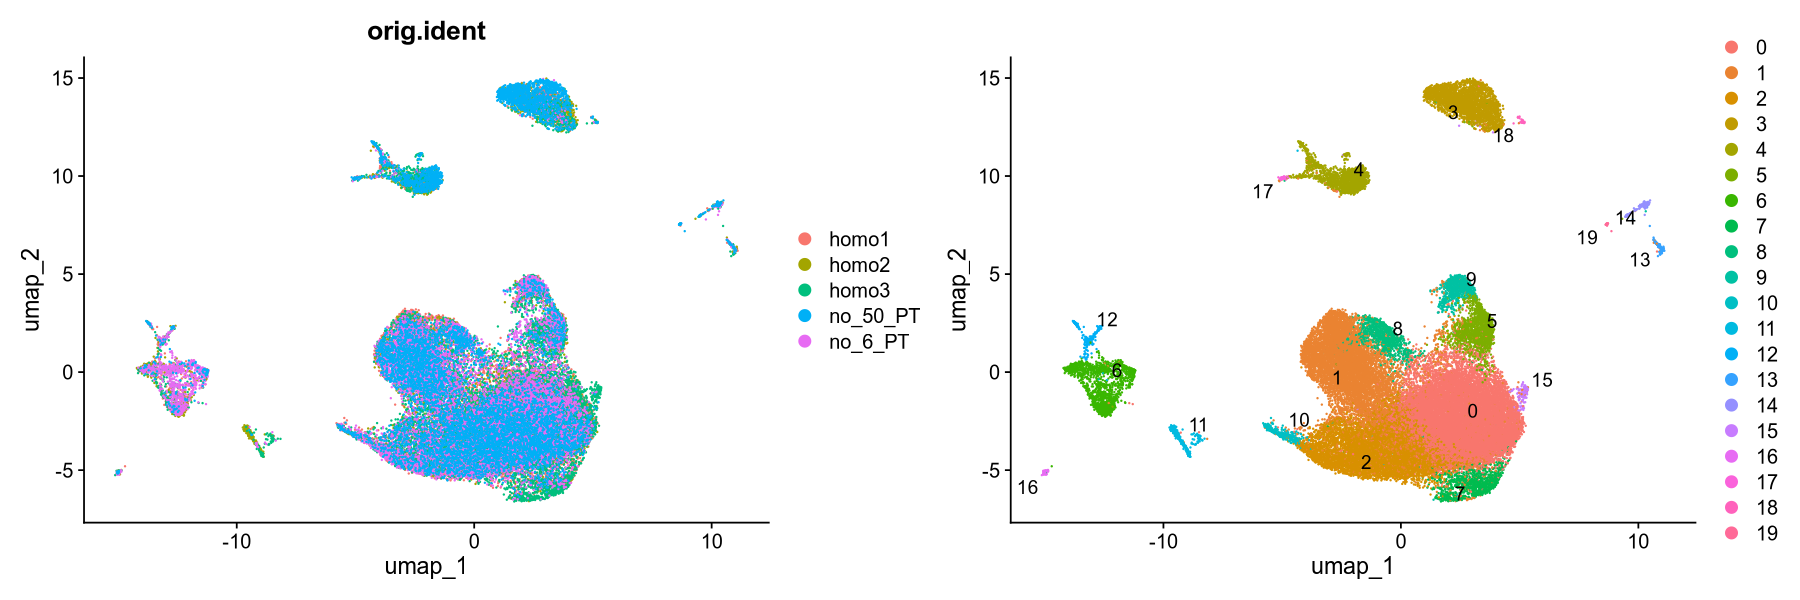

In [16]:
fig.size(5,15)
p1 <- DimPlot(homo, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(homo, reduction = "umap", label = TRUE,
    repel = TRUE)
p1 + p2

In [18]:
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)[1:15]
names(color.list) = homo@meta.data$annot %>% unique

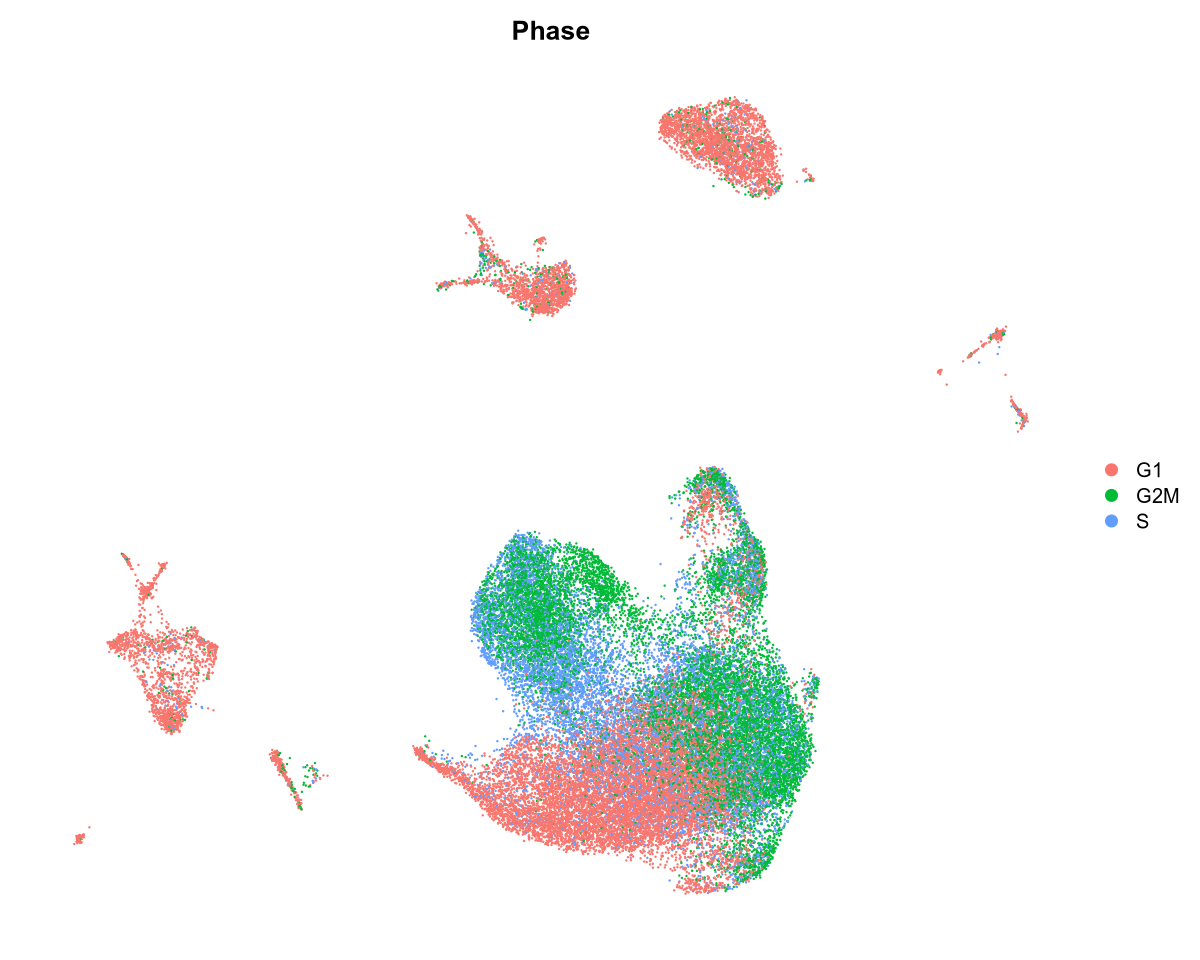

In [22]:
fig.size(8,10)
p1 = DimPlot(homo, group.by = "Phase") + NoAxes()
p1

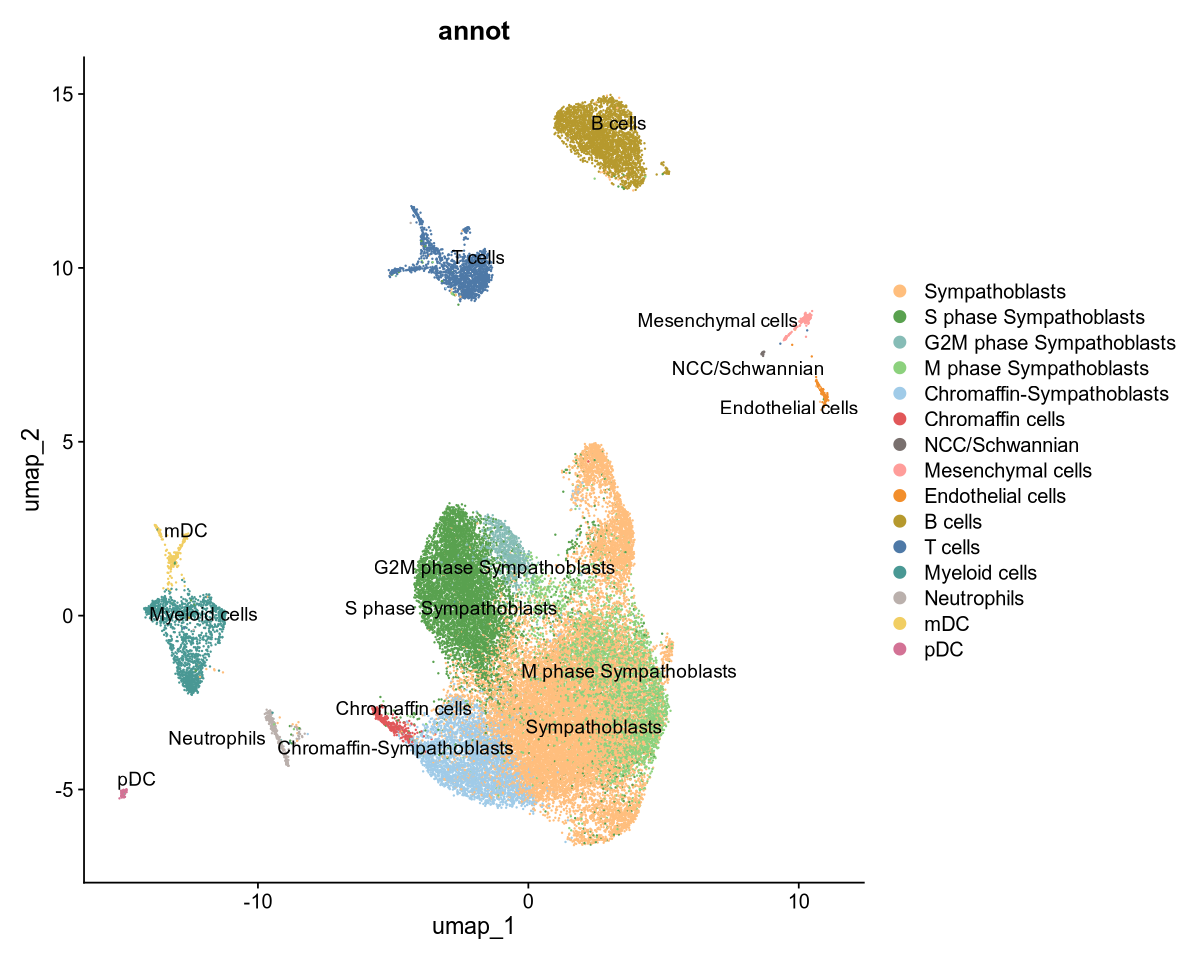

In [24]:
fig.size(8, 10)
p2 = DimPlot(homo, group.by = 'annot',
        reduction = "umap", label = TRUE,
    repel = TRUE) + 
    scale_color_manual(values = color.list)
p2

In [25]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_1/20240627_Annotations_5-Homozygous_ccregression_labeled.pdf'),
    plot =p2, 
    height = 9,
    width = 15,
    create.dir=TRUE
      )


In [26]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_1/20240627_Annotations_5-Homozygous_cellcycle.pdf'),
    plot =p1, 
    height = 9,
    width = 15,
    create.dir=TRUE
      )


In [ ]:
fig.size(8, 10)
DimPlot(homo, group.by = 'annot',
        reduction = "umap", label = TRUE,
    repel = TRUE) + 
    scale_color_manual(values = color.list)